In [1]:
import itertools
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from node_SIS import EpidemicGraph, TransitionDiagram
%matplotlib inline

In [2]:
def average_n(n, r, paramet, csv, nstep=300):
    listt = []
    timingg = []
    print(N)
    for i in range(n):
        a = EpidemicGraph(N,r,paramet,I=4, grid_size=[30,30])
        a.load_csv(csv, I0=4)
        timing = a.run(nstep)
        listt.append(a.hist2pandas())
        timingg.append(np.array(timing))
        print(i+1, end=' ')
    print()
    df = listt[0]
    del listt[0]
    for v in listt:
        df += v
    df /= n  # average population
    b = []
    for tm in timingg:
        b.append(tm - tm[0])
    c = np.array(b)  
    return df, c.mean(axis=0) # average time

WS_100.csv {'betta': 0.1, 'gamma': 0.3} 100
100
1 2 3 4 5 6 7 8 9 10 
WS_100.csv {'betta': 0.7, 'gamma': 0.9} 100
100
1 2 3 4 5 6 7 8 9 10 
WS_100.csv {'betta': 0.5, 'gamma': 0.2} 100
100
1 2 3 4 5 6 7 8 9 10 


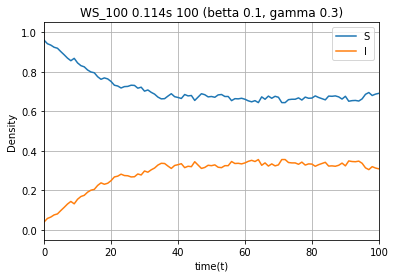

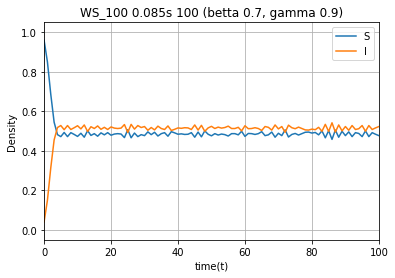

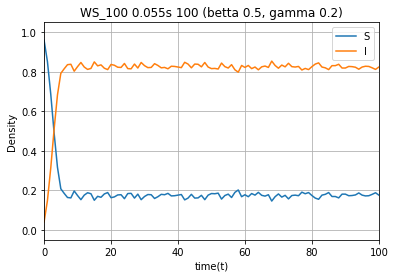

In [3]:
# csv_list = ['BA_100.csv', 'ER_100.csv', 'WS_100.csv', 
#             'BA_256.csv', 'ER_256.csv', 'WS_256.csv',
#             'BA_1024.csv', 'ER_1024.csv', 'WS_1024.csv']
# csv_list = ['BA_100.csv', 'BA_256.csv', 'BA_1024.csv']
csv_list = ['WS_100.csv']
param_list = [{'betta': 0.1, 'gamma': 0.3},
              {'betta': 0.7, 'gamma': 0.9},
              {'betta': 0.5, 'gamma': 0.2}]
r = 0 # dummy, because adjacency matrix is loaded directly from file
for csv, paramet in itertools.product(csv_list, param_list):
    N = int(csv.split('_')[-1].split('.')[0])
    print(csv, paramet, N)
    population_N, tm = average_n(10, r, paramet, csv, nstep=100)
    population_1 = population_N/N
    f = population_1.plot(grid=True)
    plot_title = '{} {:.3f}s {} (betta {betta}, gamma {gamma})'.format(csv.split('.')[0], tm[-1]-tm[0], N, **paramet)
    pdf_title = 'fig/{} (betta {betta}, gamma {gamma}).pdf'.format(csv.split('.')[0], **paramet)
    plt.title(plot_title)
    plt.xlabel('time(t)')
    plt.ylabel('Density')
    plt.xlim([0, 100])
    plt.ylim([-0.05,1.05])
    f.get_figure().savefig(pdf_title, bbox_inches='tight')